# Problem Definition


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.



# Step 1: Reading and Understanding the Data

In [1]:
#IMPORT NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#TO ASSIGN THE CSV FILE INTO A VARIABLE
BB = pd.read_csv("day.csv")

In [3]:
#HAVE LOOK AT DATA
BB.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#To check the columns in dataset
print(BB.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [5]:
#Get statistical describtion of data using describe()
BB.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#To check null values in dataset

count=BB.isnull().sum()
print(count)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
#To checkdatatypes of columns
BB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# To check the first 10 data in the dataset
BB.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [9]:
#check for datatypes again
BB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Step 2: Preparation of the Data

Few VERS like 'instant','dteday','casual','registered' has no use in the analysis, therefore We drop those

In [10]:
BB.drop(['instant'],axis=1,inplace=True)
BB.drop(['dteday'],axis=1,inplace=True)
BB.drop(['casual','registered'],axis=1,inplace=True)

season,yr,mnth,holiday,weekday,workingday,weathersit are the categorical variables, so we need to replace with the appropiate values

In [11]:
BB['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
BB['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
BB['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)


In [12]:
# To check the head of the dataset again
BB.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Saturday,0,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Sunday,0,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Monday,1,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Tuesday,1,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Wednesday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [13]:
# To check the datatypes again
BB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [14]:
#changing datatypes of numerical columns to appropriate types

BB[['temp','atemp','hum','windspeed','cnt']]=BB[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)


In [15]:
# To check the datatypes again

BB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


# Step 2.1: Performing the EDA

PAIRPLOTS TO UNDERSTAND NUMERICAL VARIABLES

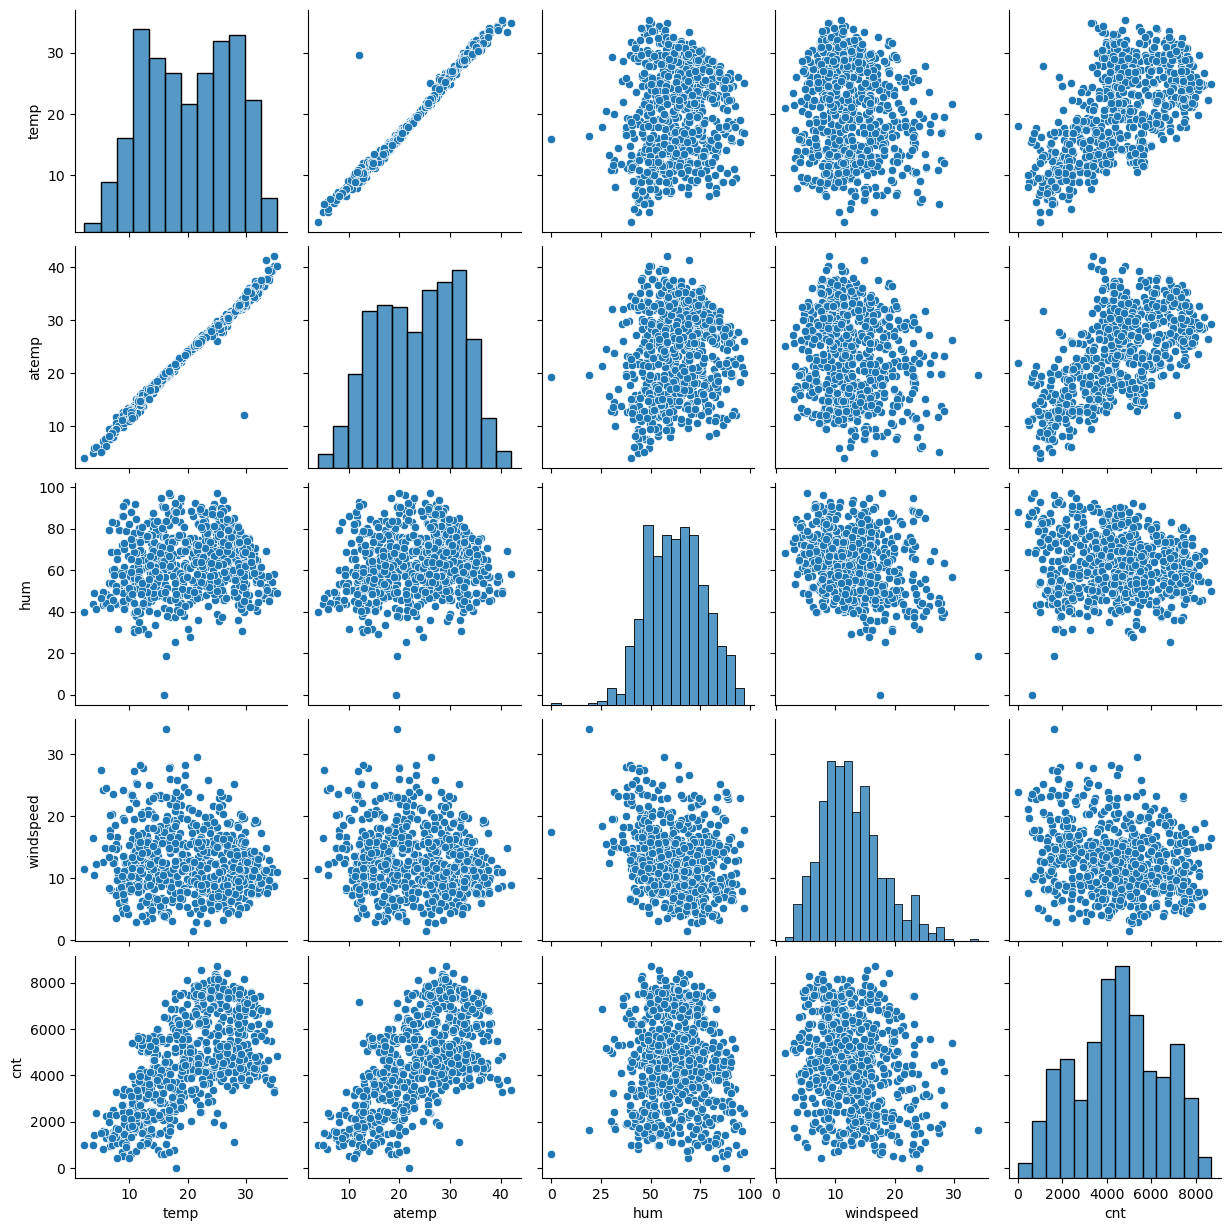

In [16]:
# To check the corellation between different numerical variables
sns.pairplot(BB, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

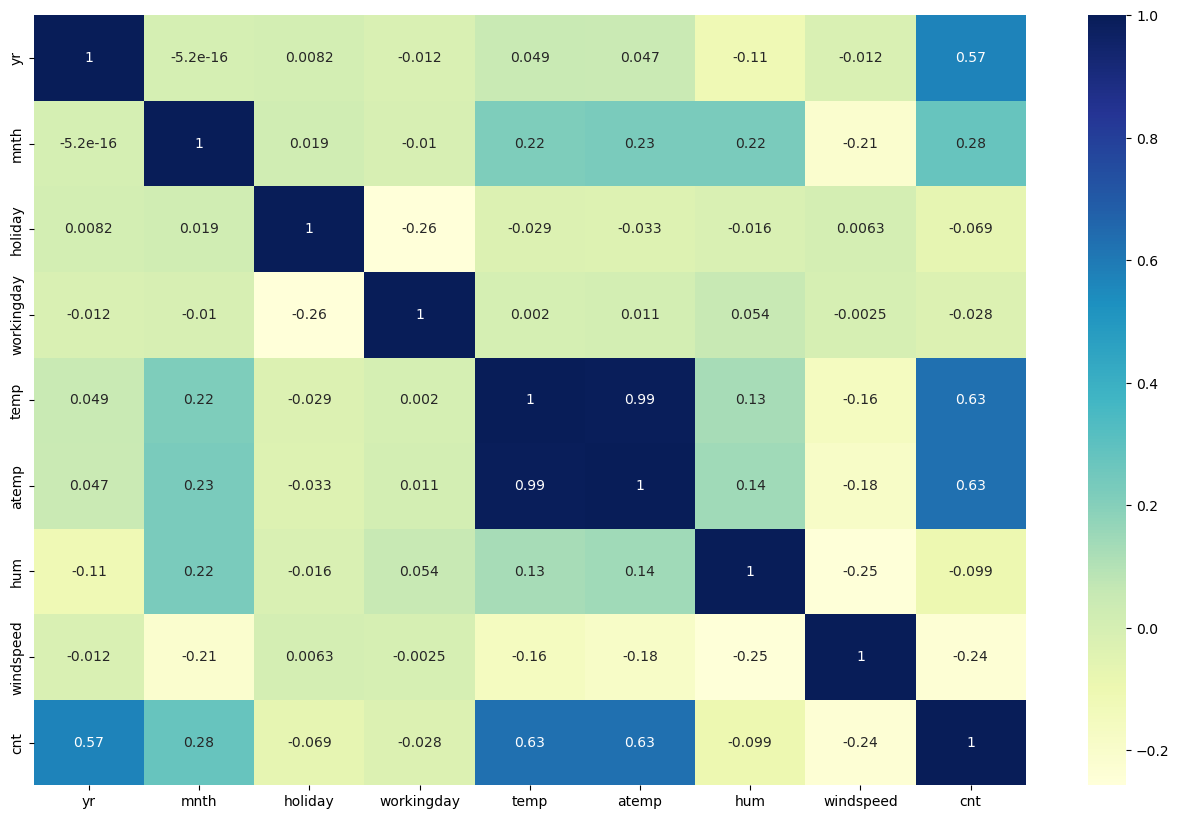

In [17]:
# To check the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(BB.corr(), annot = True, cmap="YlGnBu")
plt.show()

From above two visualizations we can say that temp and atemp have a relationship with 0.99 value, so need to drop it

In [18]:
#To drop temp and consider atemp

BB.drop(['temp'],axis=1,inplace=True)
BB.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,1,0,Monday,1,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tuesday,1,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thursday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Friday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


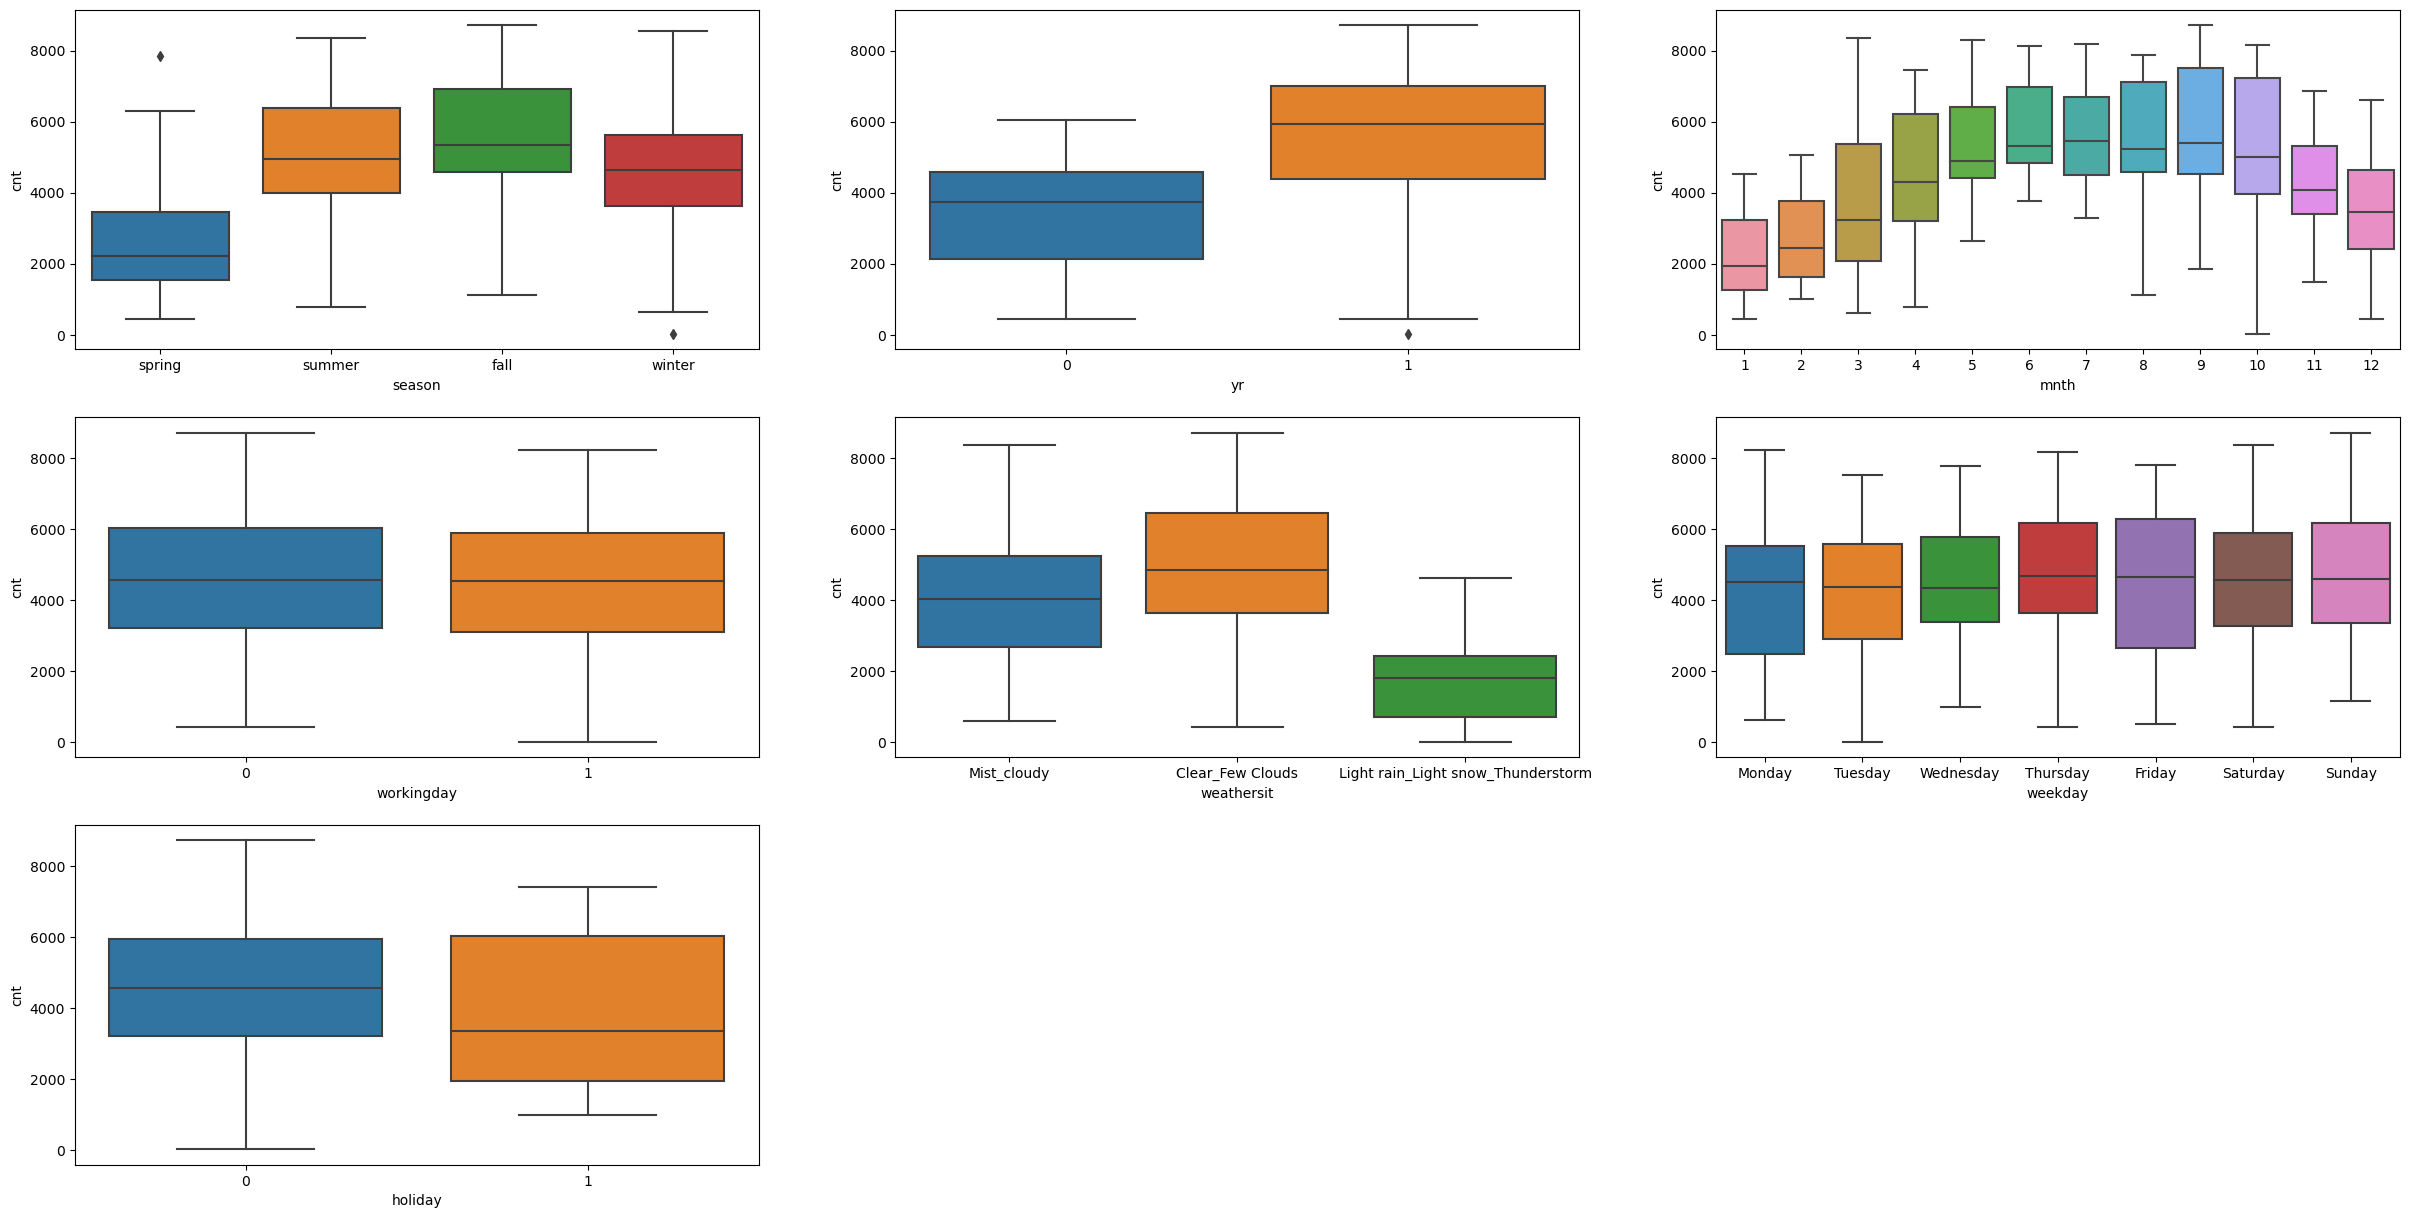

In [19]:
#To visualize the boxplot for categorical Variables 
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BB)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = BB)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = BB)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = BB)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BB)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = BB)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = BB)
plt.show()

In [20]:
#Convert some variables to object type
BB['mnth']=BB['mnth'].astype(object)
BB['season']=BB['season'].astype(object)
BB['weathersit']=BB['weathersit'].astype(object)
BB['weekday']=BB['weekday'].astype(object)
BB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [21]:
#TO CREAT DUMMY VARIABLES FOR CATEGORICAL DATA 

Season_condition=pd.get_dummies(BB['season'],drop_first=True)
Weather_condition=pd.get_dummies(BB['weathersit'],drop_first=True)
Day_of_week=pd.get_dummies(BB['weekday'],drop_first=True)
Month=pd.get_dummies(BB['mnth'],drop_first=True)

In [22]:
# TO CONCATINATE THE CATEGORICAL VARIABLES ALONG WITH DUMMY VARS WITH THE DATASET
BB=pd.concat([BB,Season_condition],axis=1)
BB=pd.concat([BB,Weather_condition],axis=1)
BB=pd.concat([BB,Day_of_week],axis=1)
BB=pd.concat([BB,Month],axis=1)
BB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season                              730 non-null    object 
 1   yr                                  730 non-null    int64  
 2   mnth                                730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   weathersit                          730 non-null    object 
 7   atemp                               730 non-null    float64
 8   hum                                 730 non-null    float64
 9   windspeed                           730 non-null    float64
 10  cnt                                 730 non-null    int64  
 11  spring                              730 non-n

In [23]:
#To delete the orginal columns season.weathersit,weekday,mnth
BB.drop(['season'],axis=1,inplace=True)
BB.drop(['weathersit'],axis=1,inplace=True)

BB.drop(['weekday'],axis=1,inplace=True)

BB.drop(['mnth'],axis=1,inplace=True)

BB.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 3: Rescaling the Data

In [24]:
# To split the dataset into test and train sets
from sklearn.model_selection import train_test_split

# To split the dataset as 70% train and 30% test set
np.random.seed(0)
BB_train, BB_test = train_test_split(BB, train_size = 0.7, test_size = 0.3, random_state = 100)


In [25]:
# To check the train set head
BB_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [26]:
# To check the test head
BB_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,0,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [27]:
# To find the name of all train columns
BB_train.columns



Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                      'cnt',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
                                          2,
                                          3,
                                          4,
                                          5,
          

In [28]:
#IMPORTING THE LIBRARIES FOR SCALING THE NUMERICAL VERS WITH MIN AND MAX VALUES
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [29]:
# Scaling the Numerical vars with min and max values
num_vars=['atemp','hum','windspeed','cnt']
BB_train[num_vars] = scaler.fit_transform(BB_train[num_vars])

In [30]:
# To check the head of the train dataset
BB_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [31]:
# To check the description of training dataset
BB_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
# CREATING X AND y vers for analysing the data
y_train = BB_train.pop('cnt')
X_train = BB_train

In [33]:
# To check the head of the X_train dataset
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,Light rain_Light snow_Thunderstorm,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [34]:
# To check the head of the y_train dataset
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

# Step 4: Performing the Linear Regression

In [35]:
# Importing the important libraries for feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
#TO SELECT THE FEATURES USING RFE METHOD
# STARTING RFE WITH 15 VERS

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select= 15)            
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 10),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 14),
 ('Tuesday', False, 9),
 ('Wednesday', False, 13),
 (2, False, 8),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 7),
 (8, True, 1),
 (9, True, 1),
 (10, False, 2),
 (11, False, 11),
 (12, False, 12)]

In [38]:
# The columns that supoort the RFE
col = X_train.columns[rfe.support_]
col

Index([                                'yr',
                                  'holiday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9],
      dtype='object')

In [39]:
# The columns that do not supoort the RFE
X_train.columns[~rfe.support_]

Index(['workingday',     'summer',     'Monday',   'Saturday',     'Sunday',
         'Thursday',    'Tuesday',  'Wednesday',            2,            7,
                 10,           11,           12],
      dtype='object')

In [40]:
# To assign a new variable that support the RFE
X_train_rfe = X_train[col]

In [41]:
# To import the statmodels library and add one constant with X_train_rfe

import statsmodels.api as sm  

# To assign a new VER named as X_train_rfe1
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [42]:
# To build the model using statmodels 
lm = sm.OLS(y_train,X_train_rfe1).fit()

In [43]:
# To print the summery of Linear Regrassion
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          8.06e-186
Time:                        11:10:52   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [44]:
# To use of VIF in the analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.72
2,atemp,15.52
4,windspeed,4.56
5,spring,3.52
6,winter,3.21
8,Mist_cloudy,2.26
0,yr,2.08
13,8,1.90
11,5,1.77
10,4,1.68


In [45]:
# To check the head of X_train_rfe1
X_train_rfe1.head()

,const,yr,holiday,atemp,hum,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,4,5,6,8,9
653,1.0,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1.0,1,0,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,0,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,1,0,0,1,1,0,0,0,0,0
728,1.0,1,0,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,0,0,0,1,0,1,0,0,0,0


In [46]:
# 'hum' HAS A VERY HIGH VIF SO WE DROP IT 
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [47]:
# Fit a linear model using Ordinary Least Squares
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [48]:
# To print the summery of Linear Regrassion
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          8.06e-186
Time:                        11:10:52   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [49]:
# To use of VIF in the analysis again
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.26
3,windspeed,4.56
4,spring,2.10
0,yr,2.08
5,winter,1.97
12,8,1.86
11,6,1.64
10,5,1.60
7,Mist_cloudy,1.55
9,4,1.54


In [50]:
#COLUMN temp HAS A VERY HIGH VIF SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [51]:
# To build the model using statmodels again 
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.4
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          3.90e-153
Time:                        11:10:53   Log-Likelihood:                 423.38
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     496   BIC:                            -759.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [52]:
# To use of VIF in the analysis again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.95
3,spring,2.10
0,yr,1.90
4,winter,1.80
6,Mist_cloudy,1.54
8,4,1.48
9,5,1.32
7,3,1.31
11,8,1.31
10,6,1.24


In [53]:
#COLUMN WINTER HAS A VERY HIGH P VALUE SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

In [54]:
# To build the model using statmodels again  
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     145.8
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          3.54e-154
Time:                        11:10:53   Log-Likelihood:                 423.26
No. Observations:                 510   AIC:                            -820.5
Df Residuals:                     497   BIC:                            -765.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [55]:
# To use of VIF in the analysis again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.06
0,yr,1.79
3,spring,1.73
5,Mist_cloudy,1.46
7,4,1.28
6,3,1.27
8,5,1.19
10,8,1.19
9,6,1.15
11,9,1.15


In [56]:
#COLUMN 4 HAS A VERY HIGH P VALUE SO WE DROP IT
X_train_rfe=X_train_rfe.drop([4],axis=1)

In [57]:
# To build the model using statmodels again  
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.3
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          3.10e-155
Time:                        11:10:53   Log-Likelihood:                 423.13
No. Observations:                 510   AIC:                            -822.3
Df Residuals:                     498   BIC:                            -771.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [58]:
# To use of VIF in the analysis again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.63
0,yr,1.77
3,spring,1.62
5,Mist_cloudy,1.45
6,3,1.26
7,5,1.15
9,8,1.15
8,6,1.12
10,9,1.12
4,Light rain_Light snow_Thunderstorm,1.07


In [59]:
#ADDING WORKING DAY TO CHECK IF MODEL IMPROVES
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

,yr,holiday,windspeed,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,workingday
653,1,0,0.300794,0,0,0,0,0,0,0,0,1
576,1,0,0.264686,0,0,0,0,0,0,0,0,1
426,1,0,0.255342,1,0,1,1,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,1
482,1,0,0.188475,0,0,1,0,0,0,0,0,0


In [60]:
# To build the model using statmodels again 
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     147.8
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          2.62e-155
Time:                        11:10:53   Log-Likelihood:                 425.94
No. Observations:                 510   AIC:                            -825.9
Df Residuals:                     497   BIC:                            -770.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [61]:
# To use of VIF in the analysis again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.28
11,workingday,2.67
0,yr,1.85
3,spring,1.63
5,Mist_cloudy,1.47
6,3,1.26
7,5,1.17
9,8,1.17
8,6,1.14
10,9,1.14


In [62]:
#ADDING summer TO CHECK IF MODEL IMPROVES
X_train_rfe['summer']=X_train['summer']
X_train_rfe.head()


,yr,holiday,windspeed,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,workingday,summer
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,1,0
426,1,0,0.255342,1,0,1,1,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,1,0
482,1,0,0.188475,0,0,1,0,0,0,0,0,0,1


In [63]:
# To build the model using statmodels again 
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     139.0
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          6.20e-156
Time:                        11:10:53   Log-Likelihood:                 430.04
No. Observations:                 510   AIC:                            -832.1
Df Residuals:                     496   BIC:                            -772.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [64]:
# To use of VIF in the analysis again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.61
12,summer,2.74
11,workingday,2.69
3,spring,1.92
0,yr,1.86
7,5,1.75
5,Mist_cloudy,1.48
6,3,1.37
8,6,1.29
9,8,1.21


In [65]:
#ADDING monday TO CHECK IF MODEL IMPROVES
X_train_rfe['Monday']=X_train['Monday']
X_train_rfe.head()


,yr,holiday,windspeed,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,workingday,summer,Monday
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0.255342,1,0,1,1,0,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,1,0,1
482,1,0,0.188475,0,0,1,0,0,0,0,0,0,1,0


In [66]:
# To build the model using statmodels again 
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7).fit()
print(lm7.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     129.5
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          2.65e-155
Time:                        11:10:53   Log-Likelihood:                 431.12
No. Observations:                 510   AIC:                            -832.2
Df Residuals:                     495   BIC:                            -768.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [67]:
# To use of VIF in the analysis again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.61
11,workingday,2.96
12,summer,2.74
3,spring,1.92
0,yr,1.86
7,5,1.76
5,Mist_cloudy,1.48
6,3,1.37
8,6,1.29
13,Monday,1.29


In [68]:
#COLUMN MONDAY HAS A VERY HIGH P VALUE SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['Monday'],axis=1)

In [69]:
#ADDING Saturday TO CHECK IF MODEL IMPROVES
X_train_rfe['Saturday']=X_train['Saturday']
X_train_rfe.head()


,yr,holiday,windspeed,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,workingday,summer,Saturday
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0.255342,1,0,1,1,0,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0.188475,0,0,1,0,0,0,0,0,0,1,0


In [70]:
# To build the model using statmodels again 
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8).fit()
print(lm8.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     128.8
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          7.16e-155
Time:                        11:10:53   Log-Likelihood:                 430.08
No. Observations:                 510   AIC:                            -830.2
Df Residuals:                     495   BIC:                            -766.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [71]:
# To use of VIF in the analysis again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.93
11,workingday,3.42
12,summer,2.75
3,spring,1.95
0,yr,1.89
7,5,1.76
5,Mist_cloudy,1.50
13,Saturday,1.45
6,3,1.37
8,6,1.30


In [72]:
#COLUMN Saturday HAS A VERY HIGH P VALUE SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [73]:
#ADDING Sunday TO CHECK IF MODEL IMPROVES
X_train_rfe['Sunday']=X_train['Sunday']
X_train_rfe.head()

,yr,holiday,windspeed,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,workingday,summer,Sunday
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0.255342,1,0,1,1,0,0,0,0,0,0,1
728,1,0,0.663106,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0.188475,0,0,1,0,0,0,0,0,0,1,1


In [74]:
# To build the model using statmodels again 
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
print(lm9.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     128.8
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          7.46e-155
Time:                        11:10:53   Log-Likelihood:                 430.04
No. Observations:                 510   AIC:                            -830.1
Df Residuals:                     495   BIC:                            -766.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [75]:
#COLUMN SUNDAY HAS A VERY HIGH P VALUE SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['Sunday'],axis=1)

In [76]:
#ADDING Thursday TO CHECK IF MODEL IMPROVES
X_train_rfe['Thursday']=X_train['Thursday']
X_train_rfe.head()


,yr,holiday,windspeed,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,workingday,summer,Thursday
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0.255342,1,0,1,1,0,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,1,0,0
482,1,0,0.188475,0,0,1,0,0,0,0,0,0,1,0


In [77]:
# To build the model using statmodels again 
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe10).fit()
print(lm10.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     130.3
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          7.81e-156
Time:                        11:10:53   Log-Likelihood:                 432.38
No. Observations:                 510   AIC:                            -834.8
Df Residuals:                     495   BIC:                            -771.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [78]:
# To use of VIF in the analysis again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.61
11,workingday,2.95
12,summer,2.74
3,spring,1.92
0,yr,1.86
7,5,1.75
5,Mist_cloudy,1.48
6,3,1.37
8,6,1.30
13,Thursday,1.27


In [79]:
#ADDING Tuesday TO CHECK IF MODEL IMPROVES
X_train_rfe['Tuesday']=X_train['Tuesday']
X_train_rfe.head()


,yr,holiday,windspeed,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,workingday,summer,Thursday,Tuesday
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0.255342,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0.188475,0,0,1,0,0,0,0,0,0,1,0,0


In [80]:
# To build the model using statmodels again 
X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11).fit()
print(lm11.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     121.5
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          7.92e-155
Time:                        11:10:53   Log-Likelihood:                 432.53
No. Observations:                 510   AIC:                            -833.1
Df Residuals:                     494   BIC:                            -765.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [81]:
# To use of VIF in the analysis again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.62
11,workingday,3.36
12,summer,2.74
3,spring,1.93
0,yr,1.86
7,5,1.75
5,Mist_cloudy,1.48
6,3,1.37
13,Thursday,1.36
14,Tuesday,1.36


In [82]:
#COLUMN TUESDAY HAS A VERY HIGH P VALUE SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['Tuesday'],axis=1)

In [83]:
#ADDING Wednesday TO CHECK IF MODEL IMPROVES
X_train_rfe['Wednesday']=X_train['Wednesday']
X_train_rfe.head()


,yr,holiday,windspeed,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,workingday,summer,Thursday,Wednesday
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,0,0,1
576,1,0,0.264686,0,0,0,0,0,0,0,0,1,0,0,1
426,1,0,0.255342,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0.188475,0,0,1,0,0,0,0,0,0,1,0,0


In [84]:
# To build the model using statmodels again 
X_train_rfe12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe12).fit()
print(lm12.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     121.4
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          8.35e-155
Time:                        11:10:53   Log-Likelihood:                 432.47
No. Observations:                 510   AIC:                            -832.9
Df Residuals:                     494   BIC:                            -765.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [85]:
# To use of VIF in the analysis again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.62
11,workingday,3.31
12,summer,2.74
3,spring,1.92
0,yr,1.86
7,5,1.75
5,Mist_cloudy,1.48
6,3,1.37
13,Thursday,1.34
14,Wednesday,1.34


In [86]:
#COLUMN Wednesday HAS A VERY HIGH P VALUE SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['Wednesday'],axis=1)

In [87]:
#ADDING February Month TO CHECK IF MODEL IMPROVES
X_train_rfe[2]=X_train[2]
X_train_rfe.head()



,yr,holiday,windspeed,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,workingday,summer,Thursday,2
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0.255342,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0.188475,0,0,1,0,0,0,0,0,0,1,0,0


In [88]:
# To build the model using statmodels again 
X_train_rfe13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe13).fit()
print(lm13.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     121.7
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          5.52e-155
Time:                        11:10:54   Log-Likelihood:                 432.90
No. Observations:                 510   AIC:                            -833.8
Df Residuals:                     494   BIC:                            -766.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [89]:
# To use of VIF in the analysis again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.62
11,workingday,2.95
12,summer,2.76
3,spring,2.50
0,yr,1.86
7,5,1.76
14,2,1.52
6,3,1.50
5,Mist_cloudy,1.48
8,6,1.30


In [90]:
#COLUMN February month HAS A VERY HIGH P VALUE SO WE DROP IT
X_train_rfe=X_train_rfe.drop([2],axis=1)

In [91]:
#ADDING Month July TO CHECK IF MODEL IMPROVES
X_train_rfe[7]=X_train[7]
X_train_rfe.head()



,yr,holiday,windspeed,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,workingday,summer,Thursday,7
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,1,0,0,1
426,1,0,0.255342,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0.188475,0,0,1,0,0,0,0,0,0,1,0,0


In [92]:
# To build the model using statmodels again 
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14).fit()
print(lm14.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     126.1
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          5.58e-158
Time:                        11:10:54   Log-Likelihood:                 440.07
No. Observations:                 510   AIC:                            -848.1
Df Residuals:                     494   BIC:                            -780.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [93]:
# To use of VIF in the analysis again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.72
11,workingday,3.01
12,summer,2.84
3,spring,2.03
0,yr,1.89
7,5,1.75
5,Mist_cloudy,1.48
6,3,1.37
8,6,1.30
13,Thursday,1.28


In [94]:
#ADDING Month October TO CHECK IF MODEL IMPROVES
X_train_rfe[10]=X_train[10]
X_train_rfe.head()


,yr,holiday,windspeed,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,workingday,summer,Thursday,7,10
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,0,0,0,1
576,1,0,0.264686,0,0,0,0,0,0,0,0,1,0,0,1,0
426,1,0,0.255342,1,0,1,1,0,0,0,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,1,0,0,0,0
482,1,0,0.188475,0,0,1,0,0,0,0,0,0,1,0,0,0


In [95]:
# To build the model using statmodels again 
X_train_rfe15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe15).fit()
print(lm15.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     128.1
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          6.73e-164
Time:                        11:10:54   Log-Likelihood:                 456.81
No. Observations:                 510   AIC:                            -879.6
Df Residuals:                     493   BIC:                            -807.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [96]:
# To use of VIF in the analysis again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.92
11,workingday,3.14
12,summer,3.05
3,spring,2.26
0,yr,1.91
7,5,1.75
5,Mist_cloudy,1.51
6,3,1.37
15,10,1.35
9,8,1.32


In [97]:
#ADDING Month November TO CHECK IF MODEL IMPROVES
X_train_rfe[11]=X_train[11]
X_train_rfe.head()



,yr,holiday,windspeed,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,workingday,summer,Thursday,7,10,11
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,0,0,0,1,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,1,0,0,1,0,0
426,1,0,0.255342,1,0,1,1,0,0,0,0,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0.188475,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [98]:
# To build the model using statmodels again 
X_train_rfe16 = sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe16).fit()
print(lm16.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          4.89e-163
Time:                        11:10:54   Log-Likelihood:                 457.29
No. Observations:                 510   AIC:                            -878.6
Df Residuals:                     492   BIC:                            -802.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [99]:
# To use of VIF in the analysis again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.43
12,summer,3.52
11,workingday,3.47
3,spring,2.80
0,yr,1.95
7,5,1.75
16,11,1.56
5,Mist_cloudy,1.54
15,10,1.52
9,8,1.48


In [100]:
#COLUMN TUESDAY HAS A VERY HIGH P VALUE SO WE DROP IT
X_train_rfe=X_train_rfe.drop([11],axis=1)

In [101]:
#ADDING Month November TO CHECK IF MODEL IMPROVES
X_train_rfe[12]=X_train[12]
X_train_rfe.head()


,yr,holiday,windspeed,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,workingday,summer,Thursday,7,10,12
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,0,0,0,1,0
576,1,0,0.264686,0,0,0,0,0,0,0,0,1,0,0,1,0,0
426,1,0,0.255342,1,0,1,1,0,0,0,0,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,1,0,0,0,0,1
482,1,0,0.188475,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [102]:
# To build the model using statmodels again 
X_train_rfe17 = sm.add_constant(X_train_rfe)
lm17 = sm.OLS(y_train,X_train_rfe17).fit()
print(lm17.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     120.4
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          6.57e-163
Time:                        11:10:54   Log-Likelihood:                 456.98
No. Observations:                 510   AIC:                            -878.0
Df Residuals:                     492   BIC:                            -801.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [103]:
# To use of VIF in the analysis again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.01
11,workingday,3.25
12,summer,3.13
3,spring,2.27
0,yr,1.93
7,5,1.75
5,Mist_cloudy,1.53
15,10,1.39
6,3,1.38
9,8,1.36


In [104]:
#COLUMN TUESDAY HAS A VERY HIGH P VALUE SO WE DROP IT
X_train_rfe=X_train_rfe.drop([12],axis=1)

In [105]:
X_train_rfe.head()

,yr,holiday,windspeed,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,workingday,summer,Thursday,7,10
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,0,0,0,1
576,1,0,0.264686,0,0,0,0,0,0,0,0,1,0,0,1,0
426,1,0,0.255342,1,0,1,1,0,0,0,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,1,0,0,0,0
482,1,0,0.188475,0,0,1,0,0,0,0,0,0,1,0,0,0


In [106]:
# To build the model using statmodels again 
X_train_rfe18 = sm.add_constant(X_train_rfe)
lm18 = sm.OLS(y_train,X_train_rfe18).fit()
print(lm18.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     128.1
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          6.73e-164
Time:                        11:10:54   Log-Likelihood:                 456.81
No. Observations:                 510   AIC:                            -879.6
Df Residuals:                     493   BIC:                            -807.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [107]:
#COLUMN summer HAS A VERY HIGH P VALUE SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['summer'],axis=1)

In [108]:
# To build the model using statmodels again 
X_train_rfe19 = sm.add_constant(X_train_rfe)
lm19 = sm.OLS(y_train,X_train_rfe19).fit()
print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     136.9
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          5.66e-165
Time:                        11:10:54   Log-Likelihood:                 456.81
No. Observations:                 510   AIC:                            -881.6
Df Residuals:                     494   BIC:                            -813.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [109]:
# To use of VIF in the analysis again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.40
11,workingday,3.09
0,yr,1.89
3,spring,1.78
5,Mist_cloudy,1.49
6,3,1.28
12,Thursday,1.27
14,10,1.25
7,5,1.23
9,8,1.23


We have considered all columns and checked.Now we stop the model building and check on which model can we choose
Out all the models model lm19 seems to give good result so we choose it.

In [110]:
#Predict the values and store as a new vers y_train_cnt
y_train_cnt = lm19.predict(X_train_rfe14)



# Step 5: Performing the Residual Analysis

In [111]:

#CALCULATING RESIDUALS

res=y_train - y_train_cnt

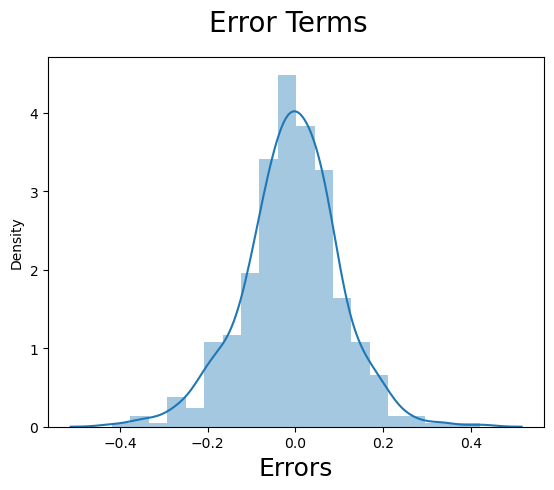

In [112]:
#Checking ASSUMPTION OF NORMALITY:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

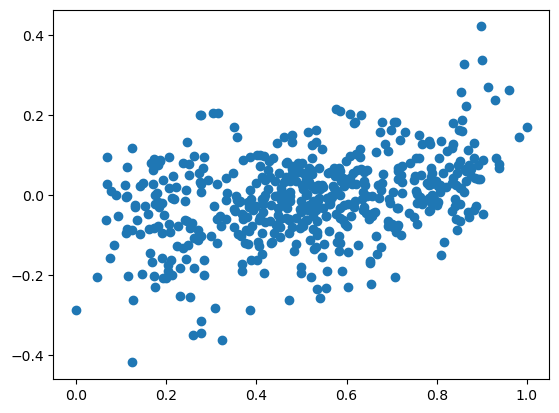

In [113]:
# Checking the pattern in residuals
plt.scatter(y_train,res)
plt.show()

There is no visible pattern present in residuals

# Step 6: Evaluating the model with Test data

In [114]:
#Scaling the test data

num_vars=['atemp','hum','windspeed','cnt']
BB_test[num_vars] = scaler.fit_transform(BB_test[num_vars])


In [115]:
#Creating x and y sets

y_test = BB_test.pop('cnt')
X_test = BB_test


In [116]:
X_train_new=X_train_rfe19.drop(['const'], axis=1)

In [117]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [118]:
#Making predictions on the chosen model

y_pred = lm19.predict(X_test_new)

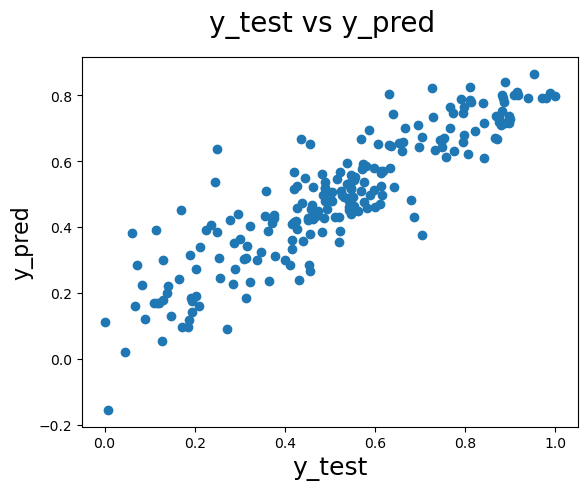

In [119]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

# Step 7: Final Evaluation of the Model

In [120]:
# Import mean_squared_error and r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [121]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.11050829337782615

In [122]:

#Calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.7846890087830839

When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [123]:
# To check the head of the dataset of X_train_new
X_train_new.head()

,yr,holiday,windspeed,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,workingday,Thursday,7,10
653,1,0,0.300794,0,0,0,0,0,0,0,0,1,0,0,1
576,1,0,0.264686,0,0,0,0,0,0,0,0,1,0,1,0
426,1,0,0.255342,1,0,1,1,0,0,0,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0.188475,0,0,1,0,0,0,0,0,0,0,0,0


In [124]:
# To print the all variables of final model
print(X_train_rfe19.columns)


Index([                             'const',
                                       'yr',
                                  'holiday',
                                'windspeed',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                               'workingday',
                                 'Thursday',
                                          7,
                                         10],
      dtype='object')


In [125]:
# To build the FINAL model using statmodels 
print(lm19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     136.9
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          5.66e-165
Time:                        11:10:55   Log-Likelihood:                 456.81
No. Observations:                 510   AIC:                            -881.6
Df Residuals:                     494   BIC:                            -813.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

We can see that the equation for best fitted line is:

cnt = 0.4677 + (0.2471 * yr) - (0.0919 * holiday) - (windspeed * 0.1469 ) - (spring * 0.1945) - (Light rain_Light snow_Thunderstorm * 0.2992) - (Mist_cloudy * 0.0908) + (Mar * 0.0697) + (May * 0.1168) + (Jun * 0.1435) + (Aug * 0.1435) + (Sep * 0.1806) - (workingday * 0.0287) + (Thursday * 0.0272) + (Jul * 0.1123) + (Oct * 0.1091)

Where 3 = Mar , 5 = May, 6 = Jun, 7 = Jul, 8 = Aug, 9 = Sep, 10 = Oct

We can see the demand for bikes depends mainly on below variables:

yr , holiday ,windspeed, spring, Mist_Cloudy, Light rain_Light snow_Thunderstorm,  Mar , May, Jun, Jul, Aug, Sep, Oct, workingday, Thursday,

Demands increases in the month of Mar , May, Jun, Jul, Aug, Sep, Oct

Demand decreases if it is holiday , windspeed, spring, Light rain_Light snow_Thunderstorm, Mist_cloudy, workingday
